In [32]:
%matplotlib inline

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as T
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST

import sys
sys.path.append('..')
from lr_finder import LRFinder

from models import ConvNet
import utils
from losses import CustomLoss

In [33]:
config = utils.parse_cfg("cfg/param.yaml")
#
data_root = config["data_root_dir"]
batch_size = config["train"]["batch_size"]

In [34]:
data_transform = T.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

trainset = MNIST(data_root, train=True, download=True, transform=data_transform)
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0)

testset = MNIST(data_root, train=False, download=True, transform=data_transform)
testloader = DataLoader(testset, batch_size=batch_size * 2, shuffle=False, num_workers=0)

In [35]:
model = ConvNet(1, 10)

In [36]:
# criterion
loss_fn = CustomLoss()
# optimer
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.5)

In [37]:
lr_finder = LRFinder(model, optimizer, loss_fn, device="cuda")
lr_finder.range_test(trainloader, end_lr=10, num_iter=100, step_mode="exp")

Stopping early, the loss has diverged

Learning rate search finished. See the graph with {finder_name}.plot()


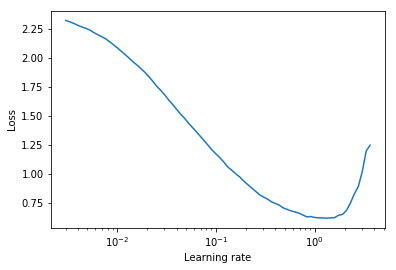

In [38]:
lr_finder.plot()

In [39]:
lr_finder.reset()